In [1]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


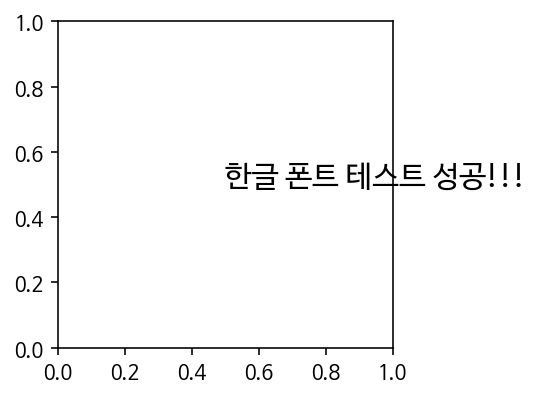

In [2]:
# 그래프 한글폰트 사용설정 in Colab
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '/content/drive/My Drive/파이썬/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [3]:
# 예제 데이터 만들기

ex = {'경도' : [127.061026,127.047883,127.899220,128.980455,127.104071,127.102490,127.088387,126.809957,127.010861,126.836078
                ,127.014217,126.886859,127.031702,126.880898,127.028726,126.897710,126.910288,127.043189,127.071184,127.076812
                ,127.045022,126.982419,126.840285,127.115873,126.885320,127.078464,127.057100,127.020945,129.068324,129.059574
                ,126.927655,127.034302,129.106330,126.980242,126.945099,129.034599,127.054649,127.019556,127.053198,127.031005
                ,127.058560,127.078519,127.056141,129.034605,126.888485,129.070117,127.057746,126.929288,127.054163,129.060972],
     '위도' : [37.493922,37.505675,37.471711,35.159774,37.500249,37.515149,37.549245,37.562013,37.552153,37.538927,37.492388
              ,37.480390,37.588485,37.504067,37.608392,37.503693,37.579029,37.580073,37.552103,37.545461,37.580196,37.562274
              ,37.535419,37.527477,37.526139,37.648247,37.512939,37.517574,35.202902,35.144776,37.499229,35.150069,35.141176
              ,37.479403,37.512569,35.123196,37.546718,37.553668,37.488742,37.493653,37.498462,37.556602,37.544180,35.111532
              ,37.508058,35.085777,37.546103,37.483899,37.489299,35.143421],
     '구분' : ['음식','음식','음식','음식','생활서비스','음식','음식','음식','음식','음식','음식','음식','음식','음식','음식'
             ,'음식','음식','소매','음식','음식','음식','음식','소매','음식','소매','음식','음식','음식','음식','음식','음식'
             ,'음식','음식','음식','음식','소매','음식','음식','의료','음식','음식','음식','소매','음식','음식','음식','음식'
             ,'음식','음식','음식']}

ex=pd.DataFrame(ex)
ex

,경도,위도,구분
0,127.061026,37.493922,음식
1,127.047883,37.505675,음식
2,127.899220,37.471711,음식
3,128.980455,35.159774,음식
4,127.104071,37.500249,생활서비스
5,127.102490,37.515149,음식
6,127.088387,37.549245,음식
7,126.809957,37.562013,음식
8,127.010861,37.552153,음식
9,126.836078,37.538927,음식


In [4]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기

lat = ex['위도'].mean()
long = ex['경도'].mean()

# 지도 띄우기
m = folium.Map([lat,long], zoom_start=9)
m

In [5]:
# 지도위에 데이터 표시

for i in ex.index:
  sub_lat = ex.loc[i,'위도']
  sub_long = ex.loc[i,'경도']

  title = ex.loc[i,'구분']

  # 지도에 데이터 찍어서 보여주기
  folium.Marker([sub_lat,sub_long], tooltip = title).add_to(m)

m

In [6]:
# 마커 모양 변경하기

m = folium.Map([lat, long], zoom_start=9)

for i in ex.index:
  sub_lat = ex.loc[i,'위도']
  sub_long = ex.loc[i,'경도']

  title = ex.loc[i,'구분']

  # 구분이 소매면 빨간색으로 표시, default는 녹색

  color = 'green'
  if ex.loc[i,'구분'] == '소매':
    color = 'red'

  # 지도에 동그라미로 데이터 찍기
  folium.CircleMarker([sub_lat, sub_long], color = color, radius= 5, tooltip=title).add_to(m)

m

# 파이썬 Folium 모듈을 이용해 GUI 지도 사용하기

* location 매개변수의 리스트에 위도, 경도를 차례로 저장하고 tiles 매개변수에는 지도의 디자인을 선택한다. zoom_start는 몇배율로 지도를 저장할 것인지를 입력하면 된다.

* tiles 매개변수에 넣어 사용할 수 있는 맵 타일은 아래와 같다.

  1. OpenStreetMap
  2. Mapbox Bright (Limited levels of zoom for free tiles)
  3. Mapbox Control Room (Limited levels of zoom for free tiles)
  4. Stamen (Terrain, Toner, and Watercolor)
  5. Cloudmade (Must pass API key)
  6. Mapbox (Must pass API key)
  7. CartoDB (positron and dark_matter)

* 위 타일중 Must pass API key 옵션이 있는것은 해당 타일 서비스 제공자로부터 API 키를 발급받아야 사용할 수 있다. 따라서 이 포스트에서는 OpenStreetMap을 사용할것이다. 따로 매개변수를 설정하지 않아도 OpenStreetMap 스타일이 적용된다.

* 위 코드를 실행시키면 같은 디렉터리에 map.html이 생성될것이다.
만약 HTML 파일을 직접적으로 생성하지 않고 Return받아 사용하고싶다면 "m.save("map.html")" 대신 "m.get_root().render()"를 사용하면 된다.

In [7]:
# [37.564214, 127.001699] 이 위치는 Google Maps에 서울을 검색했을때 받을 수 있는 기본 좌표값
m = folium.Map(
	location=[37.564214, 127.001699], tiles="OpenStreetMap", zoom_start=15)

m

## 특정 위치를 마킹하는 방법

  * Marker를 이용하면 지정한 좌표에 원하는 아이콘으로 강조할 수 있으며, tooltip을 이용해 해당 좌표를 클릭하였을 때 팝업되는 메세지를 설정할 수 있다.

In [8]:
m = folium.Map(location=[37.564214, 127.001699],
               tiles = 'OpenStreetMap', zoom_start = 15)

folium.Marker(location=[37.564214, 127.001699],
    icon=folium.Icon(color='red', icon='star'),tooltip='Center of Seoul').add_to(m)
  
m

* Circle Marker를 이용하면 지정한 좌표에 원형 표시로 강조할 수 있으며, Marker와 마찬가지로 POPUP을 설정할 수 있다.

In [9]:
m = folium.Map(location=[37.564214, 127.001699],
	tiles="OpenStreetMap",
    zoom_start=15)
    
folium.CircleMarker(location=[37.564214, 127.001699],
	radius=100, # 원의 크기
    color="#000", # 테두리색
    fill_color="#fff", # 채우기색
    popup="Center of seoul").add_to(m)

m

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import json
m = folium.Map(
    location = [37.5838699, 127.0565831],
    zoom_start = 10
)

with open('/content/drive/MyDrive/데이터파일/seoul_municipalities_geo.json',
          mode = 'rt', encoding = 'utf-8') as f:
          geo = json.loads(f.read())
          f.close()

folium.GeoJson(
    geo,
    name = 'seoul_municipalities'
).add_to(m)

m

In [ ]:
!pip install PyQt5==5.8
import io
import sys
from PyQt5 import QtWidgets, QtWebEngineWidgets

if __name__ == '__main__':
  app = QtWidgets.QApplication(sys.argv)
  m = folium.Map(
      location = [37.564214, 127.001699], tiles='OpenStreetMap', zoom_start=15
  )

  data = io.BytesIO()
  m.save(data, close_file=False)
  w = QtWebEngineWidgets.QWebEngineView()
  w.setHtml(data.getvalue().decode())
  w.resize(640, 480)
  w.show()

  sys.exit(app.exec_())

